<h1> Comparison between MLPs and CNNs for digit classification </h1>

<h2> 1: Introduction </h2>

In this notebook we will look at the simple concept of digit recognition and use it as a framework to look at the differences in performance between multilayer perceptrons (MLPs) and convolutional neural networks (CNNs). 

<h2> 2: Imports </h2>

For this project we will be using the Keras module of Tensorflow and importing the MNIST handwritten digit dataset. MatPlotLib and Random are imported for exploratory data analysis.

In [28]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import random

Using the MNIST load_data method we import our data. For both models we must use one-hot-encoding to transform our outputs. For our convolutional neural network we must also restructure the data.

In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train_MLP = x_train.reshape(x_train.shape[0], 784)
x_test_MLP = x_test.reshape(x_test.shape[0], 784)

x_train_CNN = x_train.reshape(60000, 28, 28, 1)
x_test_CNN = x_test.reshape(10000, 28, 28, 1)

60000
60000


We then use the random method to give us a preview of the data.

<function matplotlib.pyplot.show(close=None, block=None)>

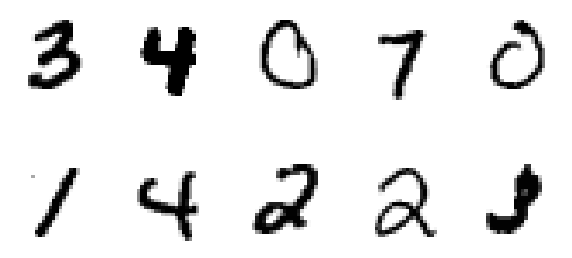

In [30]:
fig = plt.figure(figsize = (10, 5))
for i in range(10):
    n = random.randint(0, 10000)
    fig.add_subplot(2, 5, i+1)
    plt.imshow(x_train[n], cmap = 'gray_r')
    plt.axis('off')
plt.show

<h2> 3: Creating the models </h2>

Now we create our models using the Keras Sequential module, and using Dense and 2D Convolutional layers. Due to the nature of categorical modelling we have picked a relevant loss function, and we choose to use the metric of accuracy to reach a conclusion at the end.

In [31]:
MLP = Sequential([
    Dense(256, input_shape = (784, ), activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

MLP.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

MLP.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [32]:
CNN = Sequential([
    Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28, 28, 1)),
    Conv2D(16, kernel_size = 3, activation = 'relu'),
    Flatten(),
    Dense(10, activation = 'softmax')
])

CNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

CNN.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 16)        4624      
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                92170     
Total params: 97,114
Trainable params: 97,114
Non-trainable params: 0
_________________________________________________________________


<h2> 4: Training </h2>

Now we use the fit method to train each model. The batch size was chosen such that each epoch of each model took around the same time to fit, and both models ran for 10 epochs.. Throughout we will also call the test data as our validation data to compare the accuracies of the models, both over time and compared to each other.

In [33]:
MLP_hist = MLP.fit(x = x_train_MLP, y = y_train, batch_size = 4, epochs = 10, validation_data = (x_test_MLP, y_test))
CNN_hist = CNN.fit(x = x_train_CNN, y = y_train, batch_size = 32, epochs = 10, validation_data = (x_test_CNN, y_test))

Epoch 1/10
15000/15000 [==============================] - 18s 1ms/step - loss: 0.2130 - accuracy: 0.9364 - val_loss: 0.1820 - val_accuracy: 0.9443
Epoch 2/10
15000/15000 [==============================] - 18s 1ms/step - loss: 0.1141 - accuracy: 0.9679 - val_loss: 0.1108 - val_accuracy: 0.9710A: 1s - loss: 0
Epoch 3/10
15000/15000 [==============================] - 18s 1ms/step - loss: 0.0888 - accuracy: 0.9757 - val_loss: 0.1100 - val_accuracy: 0.9701
Epoch 4/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.0783 - accuracy: 0.9788 - val_loss: 0.1253 - val_accuracy: 0.9743
Epoch 5/10
15000/15000 [==============================] - 19s 1ms/step - loss: 0.0686 - accuracy: 0.9814 - val_loss: 0.1380 - val_accuracy: 0.9700
Epoch 6/10
15000/15000 [==============================] - 17s 1ms/step - loss: 0.0664 - accuracy: 0.9838 - val_loss: 0.0914 - val_accuracy: 0.9785
Epoch 7/10
15000/15000 [==============================] - 19s 1ms/step - loss: 0.0572 - accuracy: 0.984

<h2> 5: Accuracy </h2>

In this next figure we will plot both the accuracy and validation accuracy of both models as a function of the current epoch.

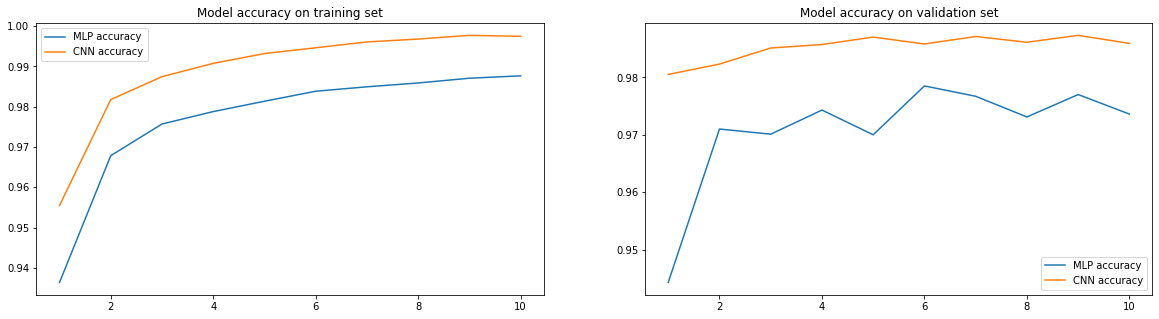

In [34]:
acc_fig = plt.figure(figsize=(20,5))
x = list(range(1,11))


MLP_acc = MLP_hist.history['accuracy']
MLP_val = MLP_hist.history['val_accuracy']

CNN_acc = CNN_hist.history['accuracy']
CNN_val = CNN_hist.history['val_accuracy']

acc_fig.add_subplot(1, 2, 1)

plt.plot(x, MLP_acc)
plt.plot(x, CNN_acc)
plt.title('Model accuracy on training set')
plt.legend(['MLP accuracy', 'CNN accuracy'])

acc_fig.add_subplot(1, 2, 2)
plt.plot(x, MLP_val)
plt.plot(x, CNN_val)
plt.title('Model accuracy on validation set')
plt.legend(['MLP accuracy', 'CNN accuracy'])



<h2> 6: Checking our results </h2>

Here we will generate a few images from our testing set similarly to before, and display the predictions made by each of our models, alongside the labelled value given as the outputs of the training set.

<function matplotlib.pyplot.show(close=None, block=None)>

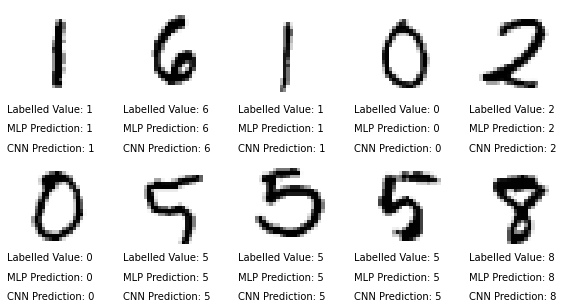

In [53]:
fig = plt.figure(figsize = (10, 5))
for i in range(10):
    n = random.randint(0, 1000)
    s_plot = fig.add_subplot(2, 5, i+1)
    plt.imshow(x_test[n], cmap = 'gray_r')
    
    label_val = y_test[n].argmax()
    MLP_input = x_test_MLP[n].reshape(1, 784)
    MLP_pred = MLP.predict(MLP_input)[0].argmax()
    CNN_input = x_test_CNN[n].reshape(1, 28, 28, 1)
    CNN_pred = CNN.predict(CNN_input)[0].argmax()
    
    s_plot.text(0, -0.1, 'Labelled Value: ' + str(label_val), transform = s_plot.transAxes)
    s_plot.text(0, -0.3, 'MLP Prediction: ' + str(MLP_pred), transform = s_plot.transAxes)
    s_plot.text(0, -0.5, 'CNN Prediction: ' + str(CNN_pred), transform = s_plot.transAxes)
    plt.axis('off')
plt.show